# Implementation of Daily Streak Strategy

This notebook gives a small explaination on how the Streaks on Daily Return works. Therefore the code is divided into small snippets with a short description and more visualizations are added.

In [210]:
import yfinance as yf  
import pandas as pd  
import datetime as dt 
from pandas.tseries.offsets import BusinessDay
import matplotlib.pyplot as plt
import numpy as np

In [211]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = tickers.Symbol.to_list()
print(tickers)

start='2010-01-01'

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [212]:
df = yf.download(tickers, start=start)

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-05-12)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [213]:
prices = df

In [214]:
prices.index = pd.to_datetime(prices.index)

In [215]:
# hd_returns = prices.pct_change().resample('M').agg(lambda x: (x+1).prod() - 1)
returns = prices['Adj Close'].pct_change()

In [216]:
returns.head(19)

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010863,0.113208,0.001729,NaN,NaN,-0.008079,-0.003336,0.006180,0.016446,-0.001579,...,-0.002242,0.021229,0.060819,-0.011860,0.003904,NaN,-0.003420,0.031656,-0.001744,NaN
2010-01-06,-0.003553,-0.041431,-0.015907,NaN,NaN,0.005553,-0.004323,0.010631,-0.002122,-0.001898,...,0.016099,-0.011057,-0.013118,0.001921,0.008643,NaN,-0.007149,-0.000323,-0.007687,NaN
2010-01-07,-0.001297,0.029469,-0.001848,NaN,NaN,0.008284,-0.005882,-0.000935,-0.019405,-0.007921,...,-0.002948,-0.004472,0.021356,-0.004313,-0.003142,NaN,-0.000288,0.022941,-0.025000,NaN
2010-01-08,-0.000324,-0.019084,0.006648,NaN,NaN,0.005112,-0.001972,-0.003977,-0.005422,0.005749,...,-0.001109,-0.009209,-0.007165,0.000481,-0.004011,NaN,0.000288,-0.021005,-0.003250,NaN
2010-01-11,0.000649,-0.019455,-0.008821,NaN,NaN,0.005086,-0.003106,-0.000940,-0.013083,-0.005716,...,0.009989,0.006574,-0.003240,0.009620,0.011220,NaN,0.017281,0.022101,0.003261,NaN
2010-01-12,-0.012005,0.007936,-0.011375,NaN,NaN,-0.002892,0.002832,-0.006348,-0.015189,-0.041520,...,0.002564,-0.011712,0.004433,0.011910,-0.004979,NaN,0.018969,-0.019255,-0.001083,NaN
2010-01-13,0.007882,0.078740,0.014105,NaN,NaN,0.009494,0.005366,0.011358,0.017386,-0.000333,...,0.002192,0.009115,0.020888,0.015536,-0.004003,NaN,0.003075,0.006598,0.014100,NaN
2010-01-14,0.014989,0.020073,-0.005791,NaN,NaN,0.001085,-0.001404,0.008891,-0.010474,-0.001000,...,-0.002188,-0.009484,0.039049,0.001855,0.000144,NaN,0.010866,0.002878,0.002852,NaN


In [217]:
formation = dt.datetime(2023,2,28)
formation

datetime.datetime(2023, 2, 28, 0, 0)

In [218]:
ret_1 = returns.loc[formation - BusinessDay(1)] 
ret_2 = returns.loc[formation - BusinessDay(2)]
ret_3 = returns.loc[formation - BusinessDay(3)]
ret_4 = returns.loc[formation - BusinessDay(4)]
ret_5 = returns.loc[formation - BusinessDay(5)]
print(ret_2)

Ticker
A      -0.013967
AAL    -0.019534
AAPL   -0.018005
ABBV    0.004208
ABNB   -0.021829
          ...   
XYL    -0.008808
YUM    -0.014300
ZBH    -0.003816
ZBRA   -0.030166
ZTS    -0.018702
Name: 2023-02-24 00:00:00, Length: 503, dtype: float64


In [219]:
def calculate_streak(x):
    if (x > 0).all():
        return 1
    elif (x < 0).all():
        return 1
    else:
        return 0

In [220]:
return_streak = pd.DataFrame({'ret_1': ret_1, 'ret_2': ret_2, 'ret_3': ret_3, 'ret_4': ret_4, 'ret_5': ret_5})
return_streak['Streak'] = return_streak.apply(lambda x: calculate_streak(x), axis=1) * return_streak.mean(axis=1)
return_streak.tail(50)

,ret_1,ret_2,ret_3,ret_4,ret_5,Streak
Ticker,,,,,,
TTWO,0.007136,-0.009695,-0.007821,-0.006963,-0.004355,-0.000000
TXN,0.009460,-0.015598,0.011896,-0.005622,-0.026010,-0.000000
TXT,-0.006797,-0.002441,0.000950,0.004226,-0.019382,-0.000000
TYL,-0.007369,-0.036955,0.014974,0.003991,-0.030093,-0.000000
UAL,0.009759,-0.007315,0.036900,0.012033,-0.028813,0.000000
UBER,0.004491,-0.031041,-0.002027,0.009942,-0.016393,-0.000000
UDR,-0.013064,-0.012896,0.002722,0.005245,-0.020112,-0.000000
UHS,-0.005990,-0.000884,-0.002374,-0.007808,-0.014527,-0.006317
ULTA,0.006077,-0.021600,0.000678,0.011754,-0.009547,-0.000000


In [221]:
# return_streak['decile'] = pd.qcut(return_streak['Streak'], 10, labels=False, duplicates='drop')
# return_streak['decile']

In [222]:
# losers = ret_1[ret_1['decile'] == 0].index
# losers
losers = return_streak[return_streak['Streak'] < 0].index
winners = return_streak[return_streak['Streak'] > 0].index
print(losers)
print(winners)

Index(['ABT', 'AEE', 'AEP', 'ALL', 'ARE', 'AWK', 'CINF', 'CMI', 'CNP', 'COR',
       'COST', 'CTSH', 'CVS', 'D', 'DOC', 'DPZ', 'ED', 'EVRG', 'FIS', 'HCA',
       'HRL', 'HSIC', 'IBM', 'JNJ', 'LNT', 'MCK', 'MRNA', 'NWS', 'NWSA', 'PFE',
       'ROST', 'RTX', 'SO', 'TRMB', 'UHS', 'VRSN', 'WEC', 'XEL', 'YUM'],
      dtype='object', name='Ticker')
Index(['GIS'], dtype='object', name='Ticker')


In [223]:
losret = returns.loc[formation, returns.columns.isin(losers)].mean()
winret = returns.loc[formation, returns.columns.isin(winners)].mean() * (-1)
print(losret)
print(winret)

-0.010560806120686727
0.018152600033671362


In [224]:
def get_previous_business_day(dt):
    while True:
        if dt.weekday() < 5 and dt not in returns.index:
            dt -= BusinessDay(1)
        else:
            return dt


# def dailyStreaks(formation):
#     ret_1 = returns.loc[get_previous_business_day(formation - BusinessDay(1))]
#     ret_2 = returns.loc[get_previous_business_day(formation - BusinessDay(2))]
#     ret_3 = returns.loc[get_previous_business_day(formation - BusinessDay(3))]
#     ret_4 = returns.loc[get_previous_business_day(formation - BusinessDay(4))]
#     ret_5 = returns.loc[get_previous_business_day(formation - BusinessDay(5))]
#     return_streak = pd.DataFrame(
#         {"ret_1": ret_1, "ret_2": ret_2, "ret_3": ret_3, "ret_4": ret_4, "ret_5": ret_5}
#     )
#     return_streak["Streak"] = return_streak.apply(
#         lambda x: calculate_streak(x), axis=1
#     ) * return_streak.mean(axis=1)
#     losers = return_streak[return_streak["Streak"] < 0].index
#     winners = return_streak[return_streak["Streak"] > 0].index
#     losret = returns.loc[formation, returns.columns.isin(losers)].mean()
#     winret = returns.loc[formation, returns.columns.isin(winners)].mean() * (-1)
#     return losret, winret


def dailyStreaks(formation, streak_length):
    def get_previous_returns(formation, streak_length):
        previous_returns = {}
        for i in range(1, streak_length + 1):
            previous_day = formation - pd.offsets.BusinessDay(i)
            previous_returns[f"ret_{i}"] = returns.loc[get_previous_business_day(previous_day)]
        return previous_returns

    return_streak = pd.DataFrame(get_previous_returns(formation, streak_length))
    return_streak["Streak"] = return_streak.apply(
        lambda x: calculate_streak(x), axis=1
    ) * return_streak.mean(axis=1)

    losers = return_streak[return_streak["Streak"] < 0].index
    winners = return_streak[return_streak["Streak"] > 0].index

    losret = returns.loc[formation, returns.columns.isin(losers)].mean()
    winret = returns.loc[formation, returns.columns.isin(winners)].mean() * (-1)

    return losret, winret

In [225]:
dailyStreaks(formation, 3)

(-0.006659731717125633, 0.005792406976169475)

In [226]:
returns_long = []
returns_short = []
dates = []

streak = np.array([1,2,3,4,5])
for count, streak_length in enumerate(streak):
    row_returns_long = []
    row_returns_short = []
    for i in returns.index[7:]:
        print(i)
        row_returns_long.append(dailyStreaks(i, streak_length)[0])
        row_returns_short.append(dailyStreaks(i, streak_length)[1])
        dates.append(i)
    returns_long.append(row_returns_long)
    returns_short.append(row_returns_short)
        

2010-01-13 00:00:00
2010-01-14 00:00:00
2010-01-15 00:00:00
2010-01-19 00:00:00
2010-01-20 00:00:00
2010-01-21 00:00:00
2010-01-22 00:00:00
2010-01-25 00:00:00
2010-01-26 00:00:00
2010-01-27 00:00:00
2010-01-28 00:00:00
2010-01-29 00:00:00
2010-02-01 00:00:00
2010-02-02 00:00:00
2010-02-03 00:00:00
2010-02-04 00:00:00
2010-02-05 00:00:00
2010-02-08 00:00:00
2010-02-09 00:00:00
2010-02-10 00:00:00
2010-02-11 00:00:00
2010-02-12 00:00:00
2010-02-16 00:00:00
2010-02-17 00:00:00
2010-02-18 00:00:00
2010-02-19 00:00:00
2010-02-22 00:00:00
2010-02-23 00:00:00
2010-02-24 00:00:00
2010-02-25 00:00:00
2010-02-26 00:00:00
2010-03-01 00:00:00
2010-03-02 00:00:00
2010-03-03 00:00:00
2010-03-04 00:00:00
2010-03-05 00:00:00
2010-03-08 00:00:00
2010-03-09 00:00:00
2010-03-10 00:00:00
2010-03-11 00:00:00
2010-03-12 00:00:00
2010-03-15 00:00:00
2010-03-16 00:00:00
2010-03-17 00:00:00
2010-03-18 00:00:00
2010-03-19 00:00:00
2010-03-22 00:00:00
2010-03-23 00:00:00
2010-03-24 00:00:00
2010-03-25 00:00:00


In [232]:
print(len(returns_long[3]))
print(len(dates[:3606]))

3606
3606


In [233]:
frame = pd.DataFrame(
    {
        "date": dates[:3606],
        "returns_long_1": returns_long[0],
        "returns_long_2": returns_long[1],
        "returns_long_3": returns_long[2],
        "returns_long_4": returns_long[3],
        "returns_long_5": returns_long[4],
        "returns_short_1": returns_short[0],
        "returns_short_2": returns_short[1],
        "returns_short_3": returns_short[2],
        "returns_short_4": returns_short[3],
        "returns_short_5": returns_short[4],
    }
)
frame

,date,returns_long_1,returns_long_2,returns_long_3,returns_long_4,returns_long_5,returns_short_1,returns_short_2,returns_short_3,returns_short_4,returns_short_5
0,2010-01-13,0.011377,0.012116,0.013077,0.012734,0.015075,-0.009048,-0.009372,-0.007357,-0.007842,-0.009437
1,2010-01-14,0.000874,0.002754,0.001664,-0.006677,-0.007330,-0.001317,-0.002155,-0.000790,0.001734,0.004184
2,2010-01-15,-0.010904,-0.011779,-0.011432,-0.008952,-0.006714,0.011293,0.011660,0.011176,0.009685,0.012110
3,2010-01-19,0.012799,0.012799,0.012835,0.014680,0.011156,-0.013752,-0.013752,-0.013632,-0.014014,-0.015737
4,2010-01-20,-0.008196,-0.007126,-0.007126,-0.008553,-0.021377,0.010383,0.009656,0.009656,0.009994,0.010203
...,...,...,...,...,...,...,...,...,...,...,...
3601,2024-05-06,0.008257,0.010083,0.010094,0.008222,0.008606,-0.007927,-0.008286,-0.007262,-0.003747,-0.004088
3602,2024-05-07,0.007999,0.006097,0.003195,-0.010682,-0.010682,-0.001403,-0.000759,0.000295,-0.000802,-0.010187
3603,2024-05-08,0.001402,-0.001746,-0.000041,-0.000866,-0.010244,0.001777,0.001711,0.002149,0.002351,0.003092
3604,2024-05-09,0.010133,0.009102,0.015277,0.013298,0.005594,-0.006347,-0.006978,-0.006698,-0.007554,-0.007738


In [234]:
frame.returns_long_1.head(20)

0     0.011377
1     0.000874
2    -0.010904
3     0.012799
4    -0.008196
5    -0.016383
6    -0.020465
7     0.004101
8    -0.005578
9     0.006942
10   -0.010699
11   -0.010591
12    0.018480
13    0.009168
14   -0.002643
15   -0.032158
16    0.002886
17   -0.003182
18    0.011875
19    0.001221
Name: returns_long_1, dtype: float64

In [235]:
sp500_ticker = '^GSPC'
sp500_data = yf.download(sp500_ticker, start=start)

# Calculate daily returns
sp500_daily_returns = sp500_data['Adj Close'].pct_change()
print(sp500_daily_returns.to_list())

frame['S&P500'] = sp500_daily_returns[7:].values
print(frame)

[*********************100%%**********************]  1 of 1 completed

[nan, 0.0031156756258232665, 0.0005455206301101523, 0.00400120187417663, 0.0028817272914287706, 0.0017467554316374923, -0.009381166148364262, 0.008325925658531075, 0.0024264254383745687, -0.010823130159869354, 0.012499626599363545, -0.010597829662970737, -0.01894490338978838, -0.022140988764300484, 0.004598098012701168, -0.004203199573680982, 0.004880152210944955, -0.011817740959567224, -0.009829173828039273, 0.014266108894671836, 0.01297294837718499, -0.00547431142933863, -0.031140677888039425, 0.002897118921960873, -0.00886329049344714, 0.013040132316577413, -0.0022325735201887964, 0.009680437561949251, -0.002744592819371894, 0.01800074864554846, 0.0042379594555796984, 0.006584742448973557, 0.002186622042297248, -0.0010458578339902491, -0.012102809596931441, 0.00972045942422195, -0.002081040179913507, 0.0014053791778985136, 0.01015850827289455, 0.0023304422719907514, 0.00042920160206150193, 0.0037361180334851696, 0.014007480947064943, -0.00017559601339156572, 0.0017127370855292146, 0

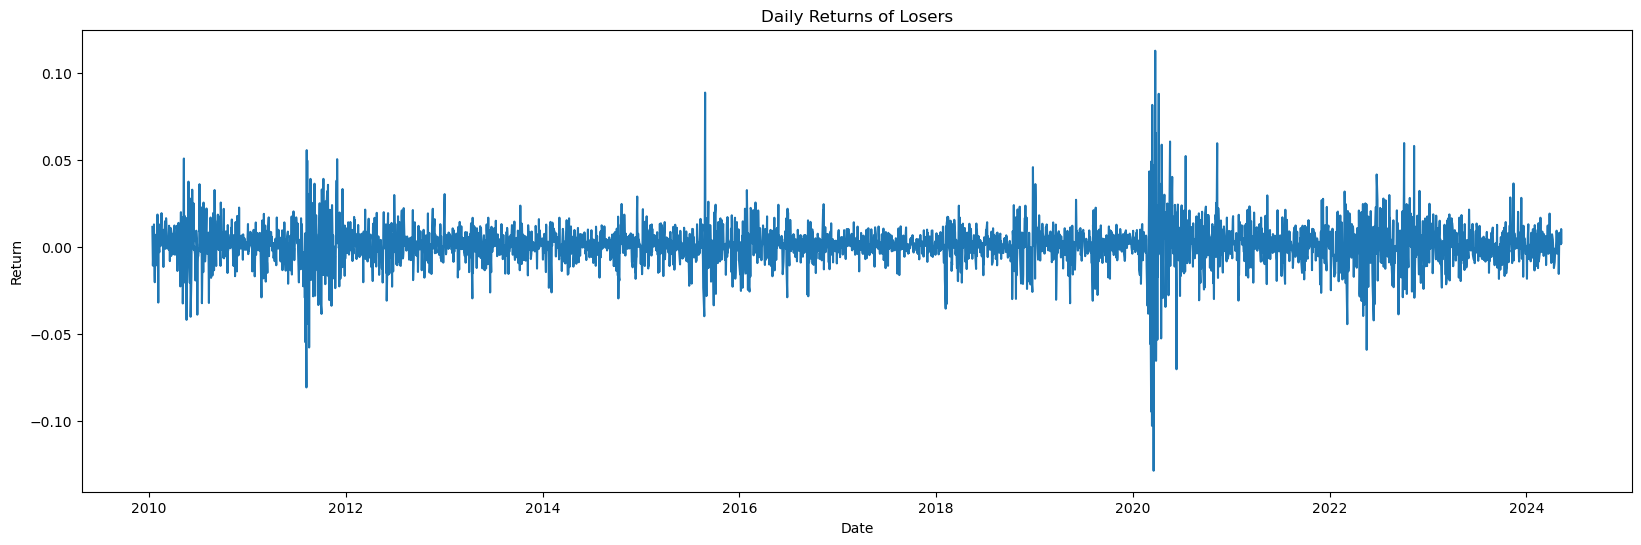

In [236]:
plt.figure(figsize=(20, 6))
plt.plot(frame.date, frame.returns_long_1)
# plt.xticks(frame.index[::200])
plt.title('Daily Returns of Losers')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [237]:
print(sp500_daily_returns)

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2024-05-06    0.010326
2024-05-07    0.001343
2024-05-08   -0.000006
2024-05-09    0.005091
2024-05-10    0.001649
Name: Adj Close, Length: 3613, dtype: float64


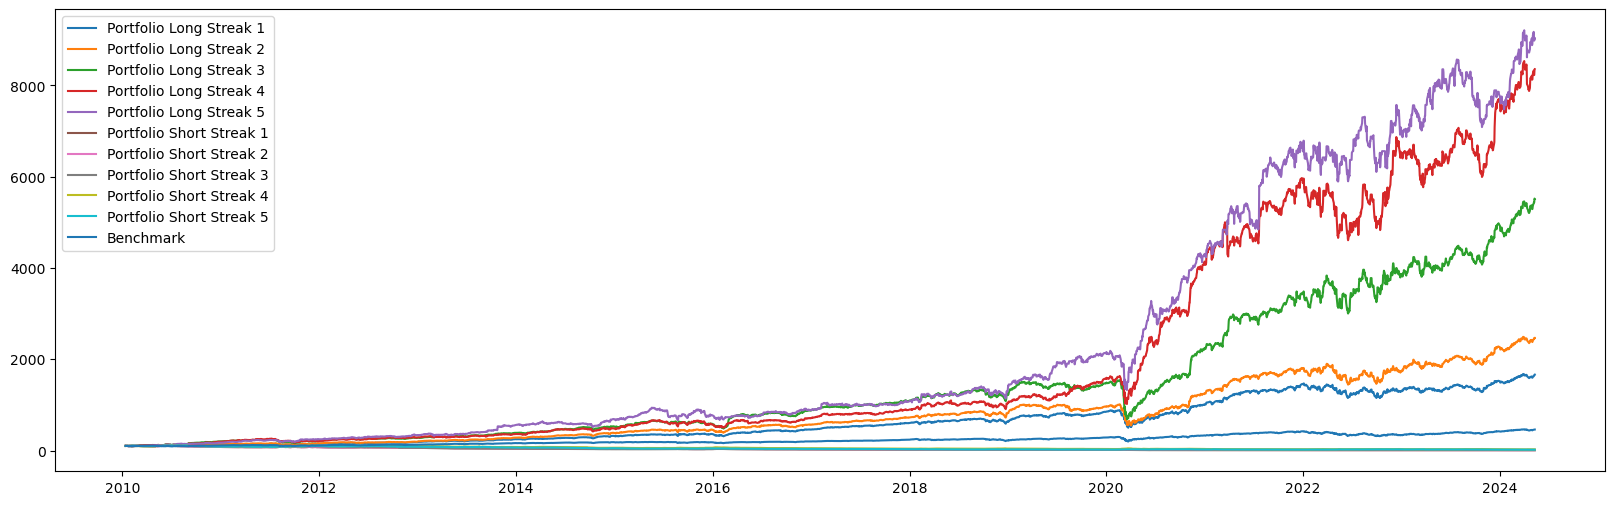

In [239]:

initial_budget = 100
cumulative_budget_port_long_1 = [initial_budget]
cumulative_budget_port_long_2 = [initial_budget]
cumulative_budget_port_long_3 = [initial_budget]
cumulative_budget_port_long_4 = [initial_budget]
cumulative_budget_port_long_5 = [initial_budget]

cumulative_budget_port_short_1 = [initial_budget]
cumulative_budget_port_short_2 = [initial_budget]
cumulative_budget_port_short_3 = [initial_budget]
cumulative_budget_port_short_4 = [initial_budget]
cumulative_budget_port_short_5 = [initial_budget]

cumulative_budget_bench = [initial_budget]

cleaned_returns_long_1 =  [0 if np.isnan(x) else x for x in frame.returns_long_1]
cleaned_returns_long_2 = [0 if np.isnan(x) else x for x in frame.returns_long_2]
cleaned_returns_long_3 = [0 if np.isnan(x) else x for x in frame.returns_long_3]
cleaned_returns_long_4 = [0 if np.isnan(x) else x for x in frame.returns_long_4]
cleaned_returns_long_5 = [0 if np.isnan(x) else x for x in frame.returns_long_5]




cleaned_returns_short_1 = [0 if np.isnan(x) else x for x in frame.returns_short_1] 
cleaned_returns_short_2 = [0 if np.isnan(x) else x for x in frame.returns_short_2]
cleaned_returns_short_3 = [0 if np.isnan(x) else x for x in frame.returns_short_3]
cleaned_returns_short_4 = [0 if np.isnan(x) else x for x in frame.returns_short_4]
cleaned_returns_short_5 = [0 if np.isnan(x) else x for x in frame.returns_short_5]

for ret in cleaned_returns_long_1:
    cumulative_budget_port_long_1.append(cumulative_budget_port_long_1[-1] * (1 + ret))

for ret in cleaned_returns_long_2:
    cumulative_budget_port_long_2.append(cumulative_budget_port_long_2[-1] * (1 + ret))

for ret in cleaned_returns_long_3:
    cumulative_budget_port_long_3.append(cumulative_budget_port_long_3[-1] * (1 + ret))

for ret in cleaned_returns_long_4:
    cumulative_budget_port_long_4.append(cumulative_budget_port_long_4[-1] * (1 + ret))

for ret in cleaned_returns_long_5:
    cumulative_budget_port_long_5.append(cumulative_budget_port_long_5[-1] * (1 + ret))

for ret in cleaned_returns_short_1:
    cumulative_budget_port_short_1.append(cumulative_budget_port_short_1[-1] * (1 + ret))

for ret in cleaned_returns_short_2:
    cumulative_budget_port_short_2.append(cumulative_budget_port_short_2[-1] * (1 + ret))

for ret in cleaned_returns_short_3:
    cumulative_budget_port_short_3.append(cumulative_budget_port_short_3[-1] * (1 + ret))

for ret in cleaned_returns_short_4:
    cumulative_budget_port_short_4.append(cumulative_budget_port_short_4[-1] * (1 + ret))

for ret in cleaned_returns_short_5:
    cumulative_budget_port_short_5.append(cumulative_budget_port_short_5[-1] * (1 + ret))

# for ret in cleand_returns_short:
#     cumulative_budget_port_short_1.append(cumulative_budget_port_short_1[-1] * (1 + ret))

for ret in frame['S&P500']:
    cumulative_budget_bench.append(cumulative_budget_bench[-1] * (1 + ret))


plt.figure(figsize=(20, 6))
plt.plot(frame.date, cumulative_budget_port_long_1[1:], label='Portfolio Long Streak 1')
plt.plot(frame.date, cumulative_budget_port_long_2[1:], label='Portfolio Long Streak 2')
plt.plot(frame.date, cumulative_budget_port_long_3[1:], label='Portfolio Long Streak 3')
plt.plot(frame.date, cumulative_budget_port_long_4[1:], label='Portfolio Long Streak 4')
plt.plot(frame.date, cumulative_budget_port_long_5[1:], label='Portfolio Long Streak 5')
plt.plot(frame.date, cumulative_budget_port_short_1[1:], label='Portfolio Short Streak 1')
plt.plot(frame.date, cumulative_budget_port_short_2[1:], label='Portfolio Short Streak 2')
plt.plot(frame.date, cumulative_budget_port_short_3[1:], label='Portfolio Short Streak 3')
plt.plot(frame.date, cumulative_budget_port_short_4[1:], label='Portfolio Short Streak 4')
plt.plot(frame.date, cumulative_budget_port_short_5[1:], label='Portfolio Short Streak 5')
plt.plot(frame.date, cumulative_budget_bench[1:], label='Benchmark')
plt.legend()
plt.show()


In [ ]:
df2 = yf.download('^GSPC', start='2009-01-01')['Adj Close']
df2

[*********************100%%**********************]  1 of 1 completed


Date
2009-01-02     931.799988
2009-01-05     927.450012
2009-01-06     934.700012
2009-01-07     906.650024
2009-01-08     909.729980
                 ...     
2024-05-06    5180.740234
2024-05-07    5187.700195
2024-05-08    5187.669922
2024-05-09    5214.080078
2024-05-10    5222.680176
Name: Adj Close, Length: 3865, dtype: float64

In [ ]:
frame

,date,returns,S&P500
0,2009-03-31,0.162782,0.085404
1,2009-04-30,0.243738,0.093925
2,2009-05-31,0.072774,0.053081
3,2009-06-30,0.026345,0.000196
4,2009-07-31,0.104616,0.074142
...,...,...,...
178,2024-01-31,0.011785,0.015896
179,2024-02-29,0.042370,0.051721
180,2024-03-31,0.059155,0.031019
181,2024-04-30,-0.083625,-0.041615


In [ ]:
frame[frame.returns > frame['S&P500']].shape

(108, 3)